# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


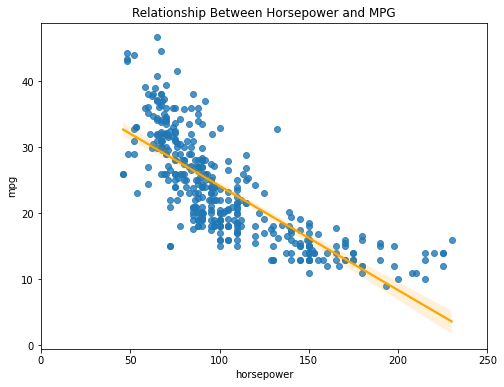

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
# call_on_students(1)

#### Answer: 

- the plot shows the slope of the model on the x-axis, and the error on the y-axis
- the smallest error is at the point m= -0.158, that is for the optimal coefficient value.
- goal is to get to the lowest error , -0.158 is the best coefficient, which gives the least amount of error. 
- the optimal weight to decrease the error


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
# call_on_students(1)

#### Answer: 

- step size: captures the amount to change the coefficient as it tries to minimize the error 
- learning rate: (lambda) -(multiplying a slope by a fraction) hyperparameter that defines the adjustment in the weights of our model with respect to the loss gradient descent , determines how large are the steps to start with, make sure we don't overshoot the minimum.

- Step size: capture the amount to change the coefficient as it tries to minimize the error term (heading oposit to the gradient (derivatives)
- learning rate: determins how large those steps are to start (proportional to the alpha)


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
# call_on_students(1)

#### Answer: 

- logistic regression used for categorical targets, in classification
- outputs: log odds, which are translated into probabilities, that predicts the class
- linear regression predicts a continuous target, and is not bound between 0 and 1. (Sigmoud function is between 0-1 - log regression is using Sigmoud function)
- it's parametric model


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
# call_on_students(1)

#### Answer: 

- benefits: simple to interpret, fits quickly, not prone to overfitting (compared to Decision Trees - prone to overfitting)
- other models: use it when you have inbalance in the target, or there are interactions between the data
- disadvantages : its parametrics , missing values need to be taken care of , don't do as well with inbalance  (SMOKE - try to balance the data)
- KNN is better with inbalance, (K supper high - counts the value counts(inbalance)

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
# call_on_students(1)

In [14]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop(columns = 'target')
y = mpg_class['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [15]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [40]:
# Code to explore
y_train.value_counts(normalize = True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- target inbalance, 74% of the data is in class 0 


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- prediction only class 0 as it has the majority (major inbalance, accuracy of 74% as it predict on class 0)
- goal is to predict to class 1,
- accuracy is predicting for class 0 (what you got right, whitch is the majority of the data (class 0)
- (ROC curve the baseline would be 74% )


#### Part 3: How accurate would that baseline be on test data?


In [41]:
# Code to find the answer
y_test.value_counts(normalize = True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- it would be 75% accurate


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [19]:
# call_on_students(1)

#### Answer:

- target is inbalance
- oversampling, SMOTE (systemic over sampling), set class-weigth
- stratify in train test split  ( keeps the proportions of the target variable and keeps it in the train, test  (class 0 % , class 1 % )
- best is SMOTE (makes it 50-50)

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [20]:
# call_on_students(1)

In [43]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


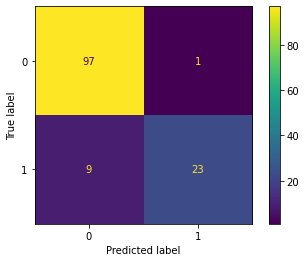

In [45]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test)

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [23]:
# call_on_students(1)

In [48]:

test_preds = logreg.predict(X_test_scaled)
# Accuracy
acc = accuracy_score(y_test, test_preds)
print(acc)

0.9230769230769231


In [49]:
# Precision
precision = precision_score(y_test, test_preds)
print(precision)

0.9583333333333334


In [50]:
# Recall
recall = recall_score(y_test, test_preds)
print(recall)

0.71875


In [51]:
# F1-Score
f1 = f1_score(y_test, test_preds)
print(f1)

0.8214285714285714


### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [28]:
# call_on_students(1)

In [53]:
# Calculate roc-auc
test_prob = logreg.predict_proba(X_test_scaled)[:,1] # get the pobability of class 1, HO -Ha - always predicting towards class 1
roc_auc_score(y_test, test_prob)

0.9811862244897959

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


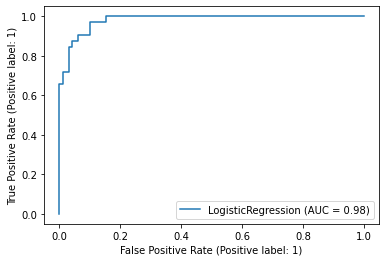

In [54]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [31]:
# call_on_students(1)

#### Answer:

- the model doing well.  Very high metrics all around - more FN than FP (better precision than recall)
- 
- recall: 

- precision : better precision than recall, based on the business problem  (might need hyperparameter tuning)


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [32]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

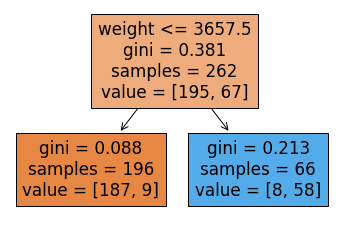

In [33]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);
# based on the two model the 1sdt one is more pure, which one has the smallest gini (0.088 + 0.213 < 0.475 + 0.022)

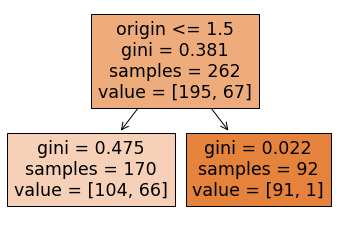

In [34]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [35]:
# call_on_students(1)

#### Answer:

- The first decision tree produces more pure splits, thus is doing a better job of separating the data


### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [36]:
# call_on_students(1)

In [57]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
#dt.fit(X_train_scaled, y_train) - you can scale and use the scaled train, but you don't have to 

DecisionTreeClassifier(random_state=42)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


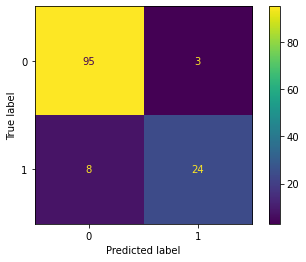

In [58]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


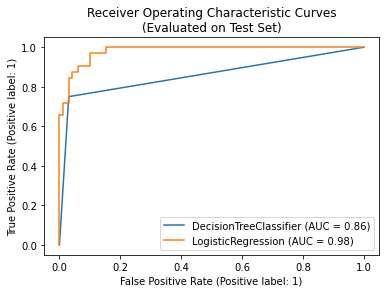

In [59]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- The logistic regression has the higher roc-auc score
- it has more area under the curve since it's closer to the top left corner of the graph
